In [9]:
import csv
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
# Create an empty graph
G = nx.Graph()

# Open the CSV file
with open('deezer_clean_data/RO_edges.csv', 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)
    
    # Iterate over each row in the CSV file
    for row in reader:
        # Access the values in each column
        node1 = row[0]
        node2 = row[1]
        
        # Add an edge to the graph
        G.add_edge(node1, node2)

In [10]:
# Basic graph statistics
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
print("Density:", nx.density(G))

Number of nodes: 41775
Number of edges: 125827
Average degree: 6.024033512866547
Density: 0.00014420533137517467


In [12]:
import random

# Get a sample of 10,000 nodes from G
sample_nodes = random.sample(list(G.nodes()), 10000)

# Create a new graph with the sample nodes
sample_graph = G.subgraph(sample_nodes)

## Centrality

In [29]:
centrality_deg = nx.degree_centrality(sample_graph)
# Once we are calculated degree centrality, we sort the results to see which nodes are more central.
print('Deezer degree centrality: ', sorted(centrality_deg.items(), key = lambda x: x[1], reverse = True)[:10])

Deezer degree centrality:  [('10426', 0.0023002300230023005), ('5434', 0.0021002100210021), ('38564', 0.0017001700170017002), ('37023', 0.0016001600160016002), ('17189', 0.0016001600160016002), ('9434', 0.0016001600160016002), ('38959', 0.0015001500150015003), ('10359', 0.0015001500150015003), ('7821', 0.0015001500150015003), ('31634', 0.0015001500150015003)]


Text(0.5, 1.0, 'Degree centrality histogram')

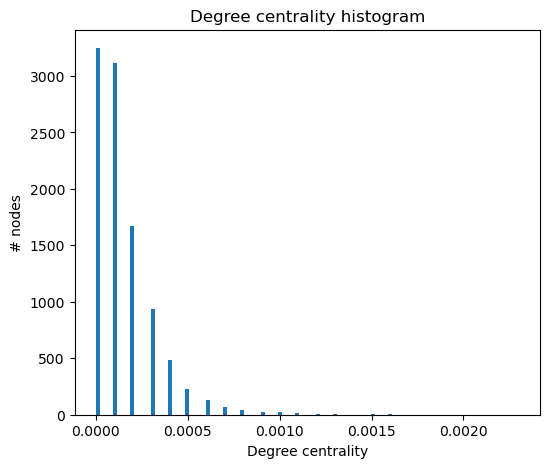

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,5))

degree_hist = plt.hist(list(centrality_deg.values()), 100)
plt.xlabel('Degree centrality')
plt.ylabel('# nodes')
plt.title('Degree centrality histogram')

In [ ]:
import json

with open('deezer_clean_data/RO_genres.json', 'r') as file:
    genres_data = json.load(file)

In [26]:
betweenness_centrality = nx.betweenness_centrality(sample_graph)
# Find top 5 nodes with highest betweenness centrality
top_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes with highest betweenness centrality:")
for node, centrality in top_nodes:
    print(f"Node {node}: {centrality}")

Top 5 nodes with highest betweenness centrality:
Node 10426: ['Dancefloor', 'Metal', 'Indie Rock', 'Dance', 'Rap/Hip Hop', 'Contemporary R&B', 'Trance', 'Pop', 'International Pop', 'R&B', 'Dubstep', 'Contemporary Soul', 'Rock', 'Indie Pop', 'Alternative', 'Electro', 'Singer & Songwriter']
Node 5434: ['Pop', 'Rock']
Node 16042: ['Rap/Hip Hop']
Node 15690: ['International Pop', 'Rap/Hip Hop', 'Pop']
Node 25857: ['Dance', 'Alternative', 'Electro']


In [27]:
for node, centrality in top_nodes:
    print(f"Node {node}: {genres_data[node]}")

Node 10426: ['Dancefloor', 'Metal', 'Indie Rock', 'Dance', 'Rap/Hip Hop', 'Contemporary R&B', 'Trance', 'Pop', 'International Pop', 'R&B', 'Dubstep', 'Contemporary Soul', 'Rock', 'Indie Pop', 'Alternative', 'Electro', 'Singer & Songwriter']
Node 5434: ['Pop', 'Rock']
Node 16042: ['Rap/Hip Hop']
Node 15690: ['International Pop', 'Rap/Hip Hop', 'Pop']
Node 25857: ['Dance', 'Alternative', 'Electro']


## Community Detection (Louvain)

In [13]:
communities = nx.community.greedy_modularity_communities(sample_graph)
print("Number of communities:", len(communities))
for i, community in enumerate(communities):
    print(f"Community {i+1}: {list(community)}")

Number of communities: 3977
Community 1: ['41002', '2528', '2618', '8622', '40044', '8708', '26103', '5951', '21204', '29511', '35708', '40217', '25263', '12530', '26752', '26307', '1435', '37129', '9129', '15634', '14416', '33378', '27366', '41336', '12804', '9241', '31711', '15074', '17677', '29106', '1233', '2226', '40166', '22761', '21721', '32385', '7678', '14815', '32923', '10086', '39004', '1690', '14513', '27855', '16318', '27335', '100', '33474', '1668', '23686', '10336', '17832', '28247', '10917', '17525', '40377', '32977', '38376', '41415', '1461', '18879', '19054', '28846', '40987', '20597', '3429', '19574', '5449', '8328', '623', '7504', '10127', '9107', '7359', '29528', '5874', '39345', '22562', '10823', '35933', '2959', '25228', '16229', '19313', '33138', '39847', '8879', '3823', '38564', '34178', '10735', '20449', '40867', '30022', '22100', '36575', '35165', '15534', '30833', '33900', '2666', '36169', '32578', '12122', '3798', '20998', '18823', '33872', '8629', '8052', 

In [22]:
import json

with open('deezer_clean_data/RO_genres.json', 'r') as file:
    genres_data = json.load(file)

result = {}

for index, community in enumerate(communities):
    # Iterate over the nodes in the community
    genre_counts = {}
    for node in community:
        
        # Get the genres liked by the profile
        genres_liked = genres_data[node]
        # Count the occurrences of each genre
        for genre in genres_liked:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1/len(community)
    result[f"community_{index}"] = genre_counts



In [24]:
for community, genre_counts in result.items():
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    top_genres = sorted_genres[:2]
    print(f"Community {community}:")
    for genre, frequency in top_genres:
        print(f"Genre: {genre}, Frequency: {frequency}")


Community community_0:
Genre: Pop, Frequency: 0.784810126582281
Genre: Rock, Frequency: 0.5981012658227863
Community community_1:
Genre: Pop, Frequency: 0.8376068376068359
Genre: Dance, Frequency: 0.5598290598290591
Community community_2:
Genre: Pop, Frequency: 0.7746478873239421
Genre: Dance, Frequency: 0.5164319248826299
Community community_3:
Genre: Pop, Frequency: 0.7771739130434804
Genre: Rap/Hip Hop, Frequency: 0.548913043478262
Community community_4:
Genre: Pop, Frequency: 0.7976190476190459
Genre: Dance, Frequency: 0.5416666666666659
Community community_5:
Genre: Pop, Frequency: 0.8300653594771222
Genre: Dance, Frequency: 0.5032679738562084
Community community_6:
Genre: Pop, Frequency: 0.8150684931506872
Genre: Dance, Frequency: 0.5342465753424669
Community community_7:
Genre: Pop, Frequency: 0.7862068965517254
Genre: Dance, Frequency: 0.5586206896551732
Community community_8:
Genre: Pop, Frequency: 0.7591240875912402
Genre: Dance, Frequency: 0.503649635036496
Community communi

In [7]:
# Define the Bron-Kerbosch Algorithm function
def bron_kerbosch(graph):
    # Initialize the sets for the maximal cliques, potential cliques, and excluded vertices
    maximal_cliques = []
    potential_cliques = set(graph.nodes())
    excluded_vertices = set()

    # Run the Bron-Kerbosch Algorithm recursively
    bron_kerbosch_recursive(graph, maximal_cliques, potential_cliques, excluded_vertices)

    # Return the maximal cliques
    return maximal_cliques

# Recursive function for the Bron-Kerbosch Algorithm
def bron_kerbosch_recursive(graph, maximal_cliques, potential_cliques, excluded_vertices):
    # Check if there are no potential cliques left
    if not potential_cliques:
        # Add the current clique to the list of maximal cliques
        maximal_cliques.append(excluded_vertices.copy())
        return

    # Select a pivot vertex from the potential cliques
    pivot = next(iter(potential_cliques))

    # Iterate over the potential cliques
    for vertex in list(potential_cliques):
        # Check if the vertex is adjacent to the pivot vertex
        if vertex not in graph.neighbors(pivot):
            continue

        # Add the vertex to the excluded vertices
        excluded_vertices.add(vertex)

        # Create a new set of potential cliques by intersecting the current potential cliques with the neighbors of the vertex
        new_potential_cliques = potential_cliques.intersection(set(graph.neighbors(vertex)))

        # Recursively call the Bron-Kerbosch Algorithm with the new potential cliques and excluded vertices
        bron_kerbosch_recursive(graph, maximal_cliques, new_potential_cliques, excluded_vertices)

        # Remove the vertex from the excluded vertices
        excluded_vertices.remove(vertex)

        # Remove the vertex from the potential cliques
        potential_cliques.remove(vertex)

# Run the Bron-Kerbosch Algorithm on the given graph
maximal_cliques = bron_kerbosch(G)

# Print the maximal cliques
for clique in maximal_cliques:
    print(clique)


In [8]:
def bron_kerbosch(graph, r, p, x, cliques):
    if not p and not x:
        cliques.append(r)
        return

    for v in list(p):
        bron_kerbosch(graph, r.union([v]), p.intersection(graph.neighbors(v)), x.intersection(graph.neighbors(v)), cliques)
        p.remove(v)
        x.add(v)

def find_all_cliques(graph):
    cliques = []
    bron_kerbosch(graph, set(), set(graph.nodes()), set(), cliques)
    return cliques

all_cliques = find_all_cliques(G)

In [25]:
def verify_cliques(graph, cliques):
    for clique in cliques:
        if not all(graph.has_edge(node1, node2) for node1 in clique for node2 in clique if node1 != node2):
            return False
    return True

# Example usage
is_valid = verify_cliques(G, all_cliques)
print(f"Are the cliques valid? {is_valid}")

Are the cliques valid? True


In [28]:
import networkx as nx

def find_k_clique_communities(graph, k):
    # Trouver toutes les cliques de taille k
    k_cliques = [clique for clique in nx.find_cliques(graph) if len(clique) == k]

    # Initialiser les communautés
    communities = []

    # Itérer sur les cliques et former des communautés
    for k_clique in k_cliques:
        community_found = False

        # Vérifier si la k-clique peut être ajoutée à une communauté existante
        for community in communities:
            if any(node in community for node in k_clique):
                community.update(k_clique)
                community_found = True
                break

        # Si la k-clique ne correspond à aucune communauté existante, créer une nouvelle communauté
        if not community_found:
            communities.append(set(k_clique))

    return communities

# Détection des k-clique communities avec k=3
k = 3
k_clique_communities = find_k_clique_communities(G, k)

